In [13]:
# Import Libraries

import numpy as np
import sympy as sp
from sympy import *
x, y, z, t, Day_Of_Year  = symbols('x y z t Day_Of_Year')
import pandas as pd
from pandas import set_option # Option to restrict display
set_option('display.max_rows',8)
import matplotlib.pyplot as plt
%matplotlib inline

First, I'm going to define a function that will print the watts per square meter of energy that would the earth from the sun if there were no atmosphere

In [6]:
def Solar_Power_Calculator(Day_Of_Year,Lattitude,Hour_of_Day):
    # Calculating Theta D
    ThetaD = (2*np.pi*Day_Of_Year)/365
    # Calculating distance
    # Constants for calculating distance
    Dis_n = [0,1,2]
    Dis_an = [1.00011,0.034221,0.000719]
    Dis_bn = [0,0.00128,0.000077]

    Dis1 = Dis_an[0]*np.cos(Dis_n[0]*ThetaD)+Dis_bn[0]*np.sin(Dis_n[0]*ThetaD)
    Dis2 = Dis_an[1]*np.cos(Dis_n[1]*ThetaD)+Dis_bn[1]*np.sin(Dis_n[1]*ThetaD)
    Dis3 = Dis_an[2]*np.cos(Dis_n[2]*ThetaD)+Dis_bn[2]*np.sin(Dis_n[2]*ThetaD)

    # Calculate Distance
    Distance = Dis1+Dis2+Dis3

    # Constants for calculating declination
    Dec_n = [0,1,2,3]
    Dec_an = [0.006918,-0.399912,-0.006758,-0.002697]
    Dec_bn = [0,0.070257,0.000907,0.00148]

    Dec1 = Dec_an[0]*np.cos(Dec_n[0]*ThetaD)+Dec_bn[0]*np.sin(Dec_n[0]*ThetaD)
    Dec2 = Dec_an[1]*np.cos(Dec_n[1]*ThetaD)+Dec_bn[1]*np.sin(Dec_n[1]*ThetaD)
    Dec3 = Dec_an[2]*np.cos(Dec_n[2]*ThetaD)+Dec_bn[2]*np.sin(Dec_n[2]*ThetaD)
    Dec4 = Dec_an[3]*np.cos(Dec_n[3]*ThetaD)+Dec_bn[3]*np.sin(Dec_n[3]*ThetaD)


    # Calculate Dec_radians
    Dec_radians = Dec1+Dec2+Dec3+Dec4
    Dec_degrees = np.degrees(Dec_radians)

    # For Hour Angle
    Hour_angle = np.radians(Hour_of_Day*15)

    # For Radians and Cos Solar Zenith Angle
    radians = np.pi/180*Lattitude
    CSZA = np.sin(radians)*np.sin(Dec_radians)+np.cos(radians)*np.cos(Dec_radians)*np.cos(Hour_angle)# Cos Solar Zenith Angle

    # Calculate Energy/Area (W/m^2)
    Watts_Per_SqMeter = SC*Distance*CSZA

    print(Watts_Per_SqMeter)

Now I'm going to try and take the above function and do the same thing except make it print the number of Wh in one square meter for a year.

In [7]:
# Making a list called total of Theta D for every day of the year
year = list(range(1,366))
ThetaD_list = []
for i in year:
    ThetaD_list.append((2*np.pi*i)/365)
len(ThetaD_list)

365

In the next cell I will define some constants and variables.  Of these, Lattitude, Area, and Panel_Efficiency are variables that should eventually be inputs to my final program.  The others are constants that are always the same.

In [31]:
# Defining some constants
Lattitude = 49.7
Area = 1.6368 # Area in m^2 that is to be covered by solar panels. 1.6368 for 255 W panel
Atm = .75 # Proportion of solar energy that makes it to the earth's surface
Panel_Efficiency = .16 # Efficiency of solar panels in converting solar energy to electricity
Dis_n = [0,1,2]
Dis_an = [1.00011,0.034221,0.000719]
Dis_bn = [0,0.00128,0.000077]
Dec_n = [0,1,2,3]
Dec_an = [0.006918,-0.399912,-0.006758,-0.002697]
Dec_bn = [0,0.070257,0.000907,0.00148]
radians = np.pi/180*Lattitude
DFE = 1.5e+11 # Distance of sun from earth
S = 3.9e+26 # Solar luminosity
SA = 2.82743e+23 # Surface area of sphere
SC = 1379.34284 # Solar constant

In [32]:
# Making Distance and Dec_radians lists for each day of the year
Hours = [12,11,10,9,8,7,6,5,4,3,2,1,0,1,2,3,4,5,6,7,8,9,10,11] # A list of all the hours of the day
Solar_Flux = 0 # Energy generated from given area of solar panels in one hour
Watts_Every_Hour = [] # A list that will become the Wh/m^2 every hour for a year
Watthours = 0 # A number that will become the total Wh in one place in one year.
for i in ThetaD_list:
    # Calculate the Distance
    Dis1 = Dis_an[0]*np.cos(Dis_n[0]*i)+Dis_bn[0]*np.sin(Dis_n[0]*i)
    Dis2 = Dis_an[1]*np.cos(Dis_n[1]*i)+Dis_bn[1]*np.sin(Dis_n[1]*i)
    Dis3 = Dis_an[2]*np.cos(Dis_n[2]*i)+Dis_bn[2]*np.sin(Dis_n[2]*i)
    Distance = Dis1+Dis2+Dis3
    # Calculate the Declination
    Dec1 = Dec_an[0]*np.cos(Dec_n[0]*i)+Dec_bn[0]*np.sin(Dec_n[0]*i)
    Dec2 = Dec_an[1]*np.cos(Dec_n[1]*i)+Dec_bn[1]*np.sin(Dec_n[1]*i)
    Dec3 = Dec_an[2]*np.cos(Dec_n[2]*i)+Dec_bn[2]*np.sin(Dec_n[2]*i)
    Dec4 = Dec_an[3]*np.cos(Dec_n[3]*i)+Dec_bn[3]*np.sin(Dec_n[3]*i)
    Dec_radians = Dec1+Dec2+Dec3+Dec4
    Dec_degrees = (np.degrees(Dec_radians))
    for i in Hours:
        Hour_angle = np.radians(i*15)
        CSZA = (np.sin(radians)*np.sin(Dec_radians)) + (np.cos(radians)*np.cos(Dec_radians)*np.cos(Hour_angle))
        if CSZA < 0:
            CSZA = 0
        Solar_Flux = (SC*Distance*CSZA)*Atm*Panel_Efficiency*Area
        Watts_Every_Hour.append(Solar_Flux)
    Watthours = sum(Watts_Every_Hour)

In [33]:
Watthours/1000

497.67507526569744

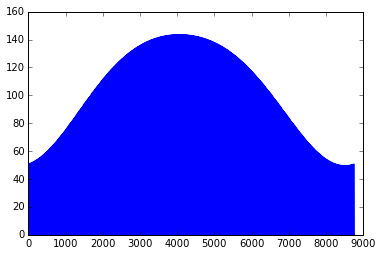

In [25]:
# Plotting Watts_Every_Hour
plt.plot(Watts_Every_Hour)

I need to find a way to resample Watts_Every_Hour because right now it goes up and down every day

In [74]:
len(Dec_radians)

365

In [39]:
sp.integrate(ThetaD,(Day_Of_Year,1,366))

1152.96450386745

In [40]:
year = list(range(1,366))
total = 0
for i in year:
    total = total+(2*np.pi*i)/365
print(total)

1149.8229112138642


In [23]:
sp.integrate(cos(x),(x,0,10))

sin(10)

In [26]:
help(sp.integrate)

Help on function integrate in module sympy.integrals.integrals:

integrate(*args, **kwargs)
    integrate(f, var, ...)
    
    Compute definite or indefinite integral of one or more variables
    using Risch-Norman algorithm and table lookup. This procedure is
    able to handle elementary algebraic and transcendental functions
    and also a huge class of special functions, including Airy,
    Bessel, Whittaker and Lambert.
    
    var can be:
    
    - a symbol                   -- indefinite integration
    - a tuple (symbol, a)        -- indefinite integration with result
                                    given with `a` replacing `symbol`
    - a tuple (symbol, a, b)     -- definite integration
    
    Several variables can be specified, in which case the result is
    multiple integration. (If var is omitted and the integrand is
    univariate, the indefinite integral in that variable will be performed.)
    
    Indefinite integrals are returned without terms that are indep